In [2]:
from clustering_utility import itIsTimeToHierarchicallyClusterSomething, hierarchicalClusteringParameterTesting

from sklearn.datasets import make_blobs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
# generate data
blobs, blob_labels = make_blobs(n_samples=250, centers=5, n_features=2, random_state=42)

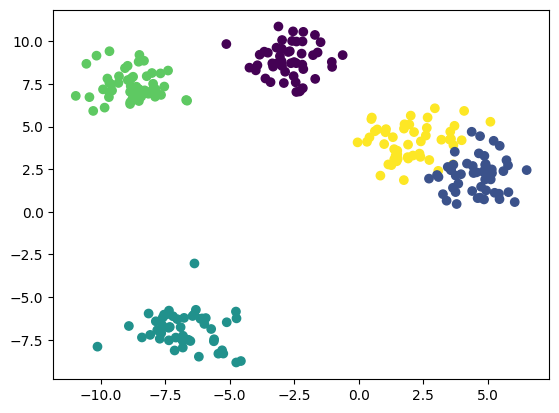

In [18]:
plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels)

In [13]:
X = ["x1", "x2"]

data = pd.DataFrame(blobs, columns=X)

# **Testing different clustering models**

In [19]:
# list methods, metrics and numbers of clusters you want to check
methods = [
    "single", "complete", "average", 
    "weighted", "centroid", "median", 
    "ward"
]
metrics = [
    "chebyshev", "cityblock", "correlation",
    "cosine", "euclidean", "minkowski",
    "sqeuclidean", "seuclidean"
]
num_of_clusters = [4, 5, 6, 7, 8]

In [29]:
tester = hierarchicalClusteringParameterTesting(
    data=data,
    X=X,
    upper_limit=0.3,
    lower_limit=0.1,
    methods=methods,
    metrics=metrics,
    num_of_clusters=num_of_clusters,
    levels_of_dendogram=None # it's not necessary when testing
)

In [30]:
# here we test the fullness of cluster based on upper_limit and lower_limit
# Note: run test_fullness() before other methods
test_fullness_df = tester.test_fullness()
test_fullness_df

this combination (method = centroid, metric = chebyshev) raised an error
this combination (method = centroid, metric = cityblock) raised an error
this combination (method = centroid, metric = correlation) raised an error
this combination (method = centroid, metric = cosine) raised an error
this combination (method = centroid, metric = minkowski) raised an error
this combination (method = centroid, metric = sqeuclidean) raised an error
this combination (method = centroid, metric = seuclidean) raised an error
this combination (method = median, metric = chebyshev) raised an error
this combination (method = median, metric = cityblock) raised an error
this combination (method = median, metric = correlation) raised an error
this combination (method = median, metric = cosine) raised an error
this combination (method = median, metric = minkowski) raised an error
this combination (method = median, metric = sqeuclidean) raised an error
this combination (method = median, metric = seuclidean) rais

,x1,x2,h_clust_5_complete_chebyshev,h_clust_5_complete_cityblock,h_clust_5_complete_cosine,h_clust_5_complete_euclidean,h_clust_5_complete_minkowski,h_clust_5_complete_sqeuclidean,h_clust_5_complete_seuclidean,h_clust_5_average_cosine,h_clust_5_weighted_cosine,h_clust_5_ward_euclidean
0,-0.623012,9.188864,2,4,3,5,5,5,5,3,5,4
1,5.226736,4.163625,4,3,5,3,3,3,3,4,4,2
2,-8.813818,7.821521,1,5,2,4,4,4,4,2,3,5
3,-4.564969,-8.747375,3,1,1,1,1,1,1,1,1,1
4,-1.478198,9.945566,2,4,3,5,5,5,5,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
245,-7.319672,-6.749369,3,1,1,1,1,1,1,1,1,1
246,-6.766110,-6.217979,3,1,1,1,1,1,1,1,1,1
247,4.605167,0.804492,4,2,5,2,2,2,2,4,4,2
248,-9.056009,8.422300,1,5,2,4,4,4,4,2,3,5


In [32]:
# testing the contrast of clusters using oneway anova
# H0: average values are equal in every cluster
# green - p < 0.05
# otherwise - red
test_contrast_df = tester.test_contrast()
test_contrast_df

,x1,x2
h_clust_5_complete_chebyshev,0.000000,0.000000
h_clust_5_complete_cityblock,0.000000,0.000000
h_clust_5_complete_cosine,0.000000,0.000000
h_clust_5_complete_euclidean,0.000000,0.000000
h_clust_5_complete_minkowski,0.000000,0.000000
h_clust_5_complete_sqeuclidean,0.000000,0.000000
h_clust_5_complete_seuclidean,0.000000,0.000000
h_clust_5_average_cosine,0.000000,0.000000
h_clust_5_weighted_cosine,0.000000,0.000000
h_clust_5_ward_euclidean,0.000000,0.000000


In [33]:
# checking interpretability of clusters

interpret_df = tester.interpret()

for k, v in interpret_df.items():
    print("\n" + k)
    display(v)


h_clust_5_complete_chebyshev


,x1,x2
cluster_1,-8.796416,7.416695
cluster_2,-2.695326,8.891022
cluster_3,-6.738743,-6.911556
cluster_4,4.525889,2.041380
cluster_5,2.116695,4.152025



h_clust_5_complete_cityblock


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.479103,1.895267
cluster_3,2.330188,4.118071
cluster_4,-2.695326,8.891022
cluster_5,-8.796416,7.416695



h_clust_5_complete_cosine


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,-8.796416,7.416695
cluster_3,-2.643362,8.796537
cluster_4,1.771651,4.205723
cluster_5,4.388120,2.364062



h_clust_5_complete_euclidean


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.479103,1.895267
cluster_3,2.330188,4.118071
cluster_4,-8.796416,7.416695
cluster_5,-2.695326,8.891022



h_clust_5_complete_minkowski


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.479103,1.895267
cluster_3,2.330188,4.118071
cluster_4,-8.796416,7.416695
cluster_5,-2.695326,8.891022



h_clust_5_complete_sqeuclidean


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.479103,1.895267
cluster_3,2.330188,4.118071
cluster_4,-8.796416,7.416695
cluster_5,-2.695326,8.891022



h_clust_5_complete_seuclidean


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.479103,1.895267
cluster_3,2.330188,4.118071
cluster_4,-8.796416,7.416695
cluster_5,-2.695326,8.891022



h_clust_5_average_cosine


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,-8.796416,7.416695
cluster_3,-2.643362,8.796537
cluster_4,4.525889,2.041380
cluster_5,2.159931,4.153619



h_clust_5_weighted_cosine


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,-2.893177,8.827695
cluster_3,-8.796416,7.416695
cluster_4,4.525889,2.041380
cluster_5,1.762893,4.699751



h_clust_5_ward_euclidean


,x1,x2
cluster_1,-6.738743,-6.911556
cluster_2,4.537405,2.200739
cluster_3,1.953644,4.111302
cluster_4,-2.695326,8.891022
cluster_5,-8.796416,7.416695


# **Creating the desired clustering model**

In [46]:
# defining parameters of the model
clust_model = itIsTimeToHierarchicallyClusterSomething(
            data=data,
            X=X,
            method="ward",
            metric="euclidean",
            num_of_clusters=[4, 5, 6, 7, 8],
            levels_of_dendogram=10,
            return_table=True
        )

In [47]:
# carry out clustering
# Note: run do_some_clustering_please() before other methods

clust_model.do_some_clustering_please()

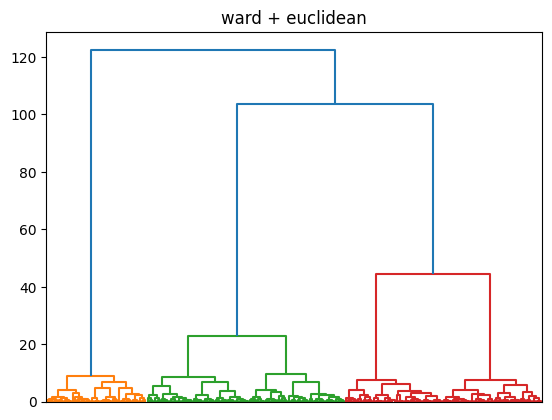

In [48]:
# plotting the dendogram
clust_model.draw_the_dendogram()

In [52]:
# get cluster labels for each observation 
clust_res = clust_model.assign_labels() 

In [53]:
clust_res

,x1,x2,h_clust_4_ward_euclidean,h_clust_5_ward_euclidean,h_clust_6_ward_euclidean,h_clust_7_ward_euclidean,h_clust_8_ward_euclidean
0,-0.623012,9.188864,3,4,5,6,7
1,5.226736,4.163625,2,2,2,3,3
2,-8.813818,7.821521,4,5,6,7,8
3,-4.564969,-8.747375,1,1,1,2,2
4,-1.478198,9.945566,3,4,5,6,7
...,...,...,...,...,...,...,...
245,-7.319672,-6.749369,1,1,1,1,1
246,-6.766110,-6.217979,1,1,1,1,1
247,4.605167,0.804492,2,2,2,3,4
248,-9.056009,8.422300,4,5,6,7,8
